<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/SENTIMENT_ANALYSIS_NLP/blob/main/Sentimnets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
---
---

###Context
- This sentiment analysis dataset contains tweets since Feb 2015 about each of the major US airline.
-  Each tweet is classified either positive, negative or neutral.

 The included features including Twitter ID, sentiment confidence score, sentiments, negative reasons, airline name, retweet count, name, tweet text, tweet coordinates, date and time of the tweet, and the location of the tweet.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, nltk
import seaborn as sns
import string

```
import chardet

# Detect encoding
with open(path, 'rb') as file:
    result = chardet.detect(file.read())

# Use detected encoding to read the file
data = pd.read_csv(path, encoding=result['encoding'])


```

In [ ]:
## csv path
path = "/content/Tweets.csv"

In [ ]:
class sentiments():
    def __init__(self, path):
        self.path = path

    def Read_Csv(self):
        try:
            data = pd.read_csv(path)
            columns = ['airline_sentiment','text']
            data = data[columns]

            ## remaming the columns
            data = data.rename(columns={
                "airline_sentiment": "target",
                "text":"reviews"})
            return data

        except pd.errors.ParserError as e:
            print(f"An error occurred while reading the CSV: {e}")


    def Data_Report(self):
        try:
            data = self.Read_Csv()
            print(f"Null_Value: {data.isnull().sum()}")             # checking null:
            sentiment_count = data.target.value_counts()        # counting values
            print("sentiment_count")
            print(f"data_duplicated: {data.duplicated().sum()}")

            print(f"data_Shape: {data.shape}")
            print(f"data_dimension: {data.ndim}")

            sns.countplot(data=data,x='target')

        except Exception as e:
            raise Exception(e)




class_call = sentiments(path)

Null_Value: target     0
reviews    0
dtype: int64
sentiment_count
data_duplicated: 188
data_Shape: (14640, 2)
data_dimension: 2


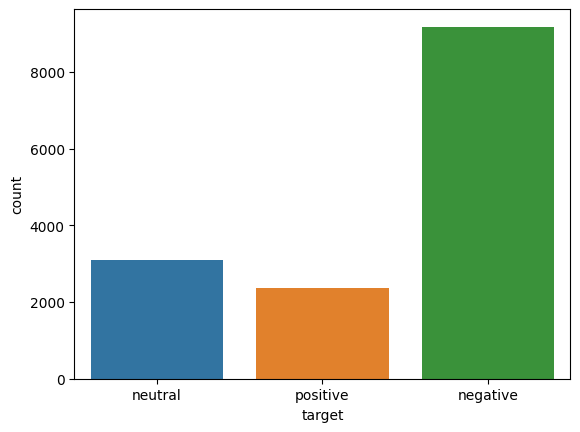

In [ ]:
class_call.Data_Report()

In [ ]:
data = class_call.Read_Csv()
## reading data
data.sample(3)

,target,reviews
8033,positive,@JetBlue I'll see you on board again soon!
6523,negative,@SouthwestAir had to rebook through Atlanta &a...
10901,negative,@USAirways your customer service is a nightmar...


In [ ]:
## removing duplicated values:
data = data.drop_duplicates()
print(f"data_duplicated: {data.duplicated().sum()}")
print(f"data_Shape: {data.shape}")

data_duplicated: 0
data_Shape: (14452, 2)


NOTE: we will going to take sample from data so droping few negative will be give us sample dataset with less columns:


In [ ]:
neg_sentiments = data[data.target == "negative"]["target"].count()
print(f"total negative sentiments: {neg_sentiments}")

neu_sentiments = data[data.target == "neutral"]["target"].count()
print(f"total neutral sentiments: {neu_sentiments}")

pos_sentiments = data[data.target == "positive"]["target"].count()
print(f"total positive sentiments: {pos_sentiments}")

total = print("total columns",pos_sentiments+neu_sentiments+neg_sentiments)

total negative sentiments: 9087
total neutral sentiments: 3067
total positive sentiments: 2298
total columns 14452


In [ ]:
# Taking the sample:
neg_sentiments_sample = data[data.target == "negative"].sample(2000)
neu_sentiments_sample = data[data.target == "neutral"].sample(2000)
pos_sentiments_sample = data[data.target == "positive"].sample(2000)

# Concatenate the samples
combined_samples = pd.concat([neg_sentiments_sample, neu_sentiments_sample, pos_sentiments_sample])

# Reset the index
sentiments_samples = combined_samples.reset_index(drop=True)

In [ ]:
## printing the sample data:
df = sentiments_samples.copy()
df.sample(5)

,target,reviews
3750,neutral,"@united rebooting Chicago dispatch system, nee..."
1053,negative,"@USAirways - the worst! Hold time crazy, agent..."
4913,positive,@JetBlue you don't remember our date Monday ni...
1210,negative,@VirginAmerica at Logan airport and waiting to...
1157,negative,@AmericanAir I fail to see how telling a calle...


In [ ]:
df.isna().sum()

target     0
reviews    0
dtype: int64

In [ ]:
df['target'].value_counts()

negative    2000
neutral     2000
positive    2000
Name: target, dtype: int64

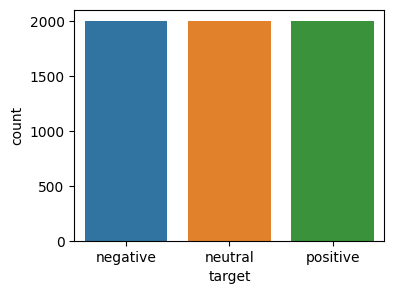

In [ ]:
# Create a figure
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='target');

In [ ]:
## saving sample data
df.to_csv("sentiment_analysis_raw_balance.csv", index=False)

## loading saved sample data

In [ ]:
df = pd.read_csv("/content/sentiment_analysis_raw_balance.csv")
df.sample(2)

,target,reviews
5946,positive,@USAirways FA attendant on 4553 PHL to PWM ton...
510,negative,@AmericanAir Stuck on the plane in Charlotte. ...


In [ ]:

## removing the tag and possible https links:
link_html_tag_pattern = [r'<.*?>', r'https://\S+',r'\d+',r'[0-9]+', r'http://\S+']
short_hand_pattern = r'\b[A-Z]{2,}\b'

# set first counter 0
counter = 0
short_hand_list = []


for i in df.reviews:                                     # loop into df reviews
    try:
        for tag in link_html_tag_pattern:               ## loop into pattern:
            i = re.sub(tag, '', i)                      ## subtituting pattern in review

        short_forms = re.findall(short_hand_pattern, i) ## checking any short hand like "ASAP"

        if short_forms is not None:
           short_hand_list.append(short_forms)         ## append to list
        df.loc[counter, 'reviews'] = i                  ## update review

    except Exception as e:
        print(f"Error processing review {counter}: {e}")

    counter = counter + 1


In [ ]:
## checking the possibe word like ASAP
for i in short_hand_list:
    if i == []:
        pass
    else:
        print(f"all short abbreviations: {set(i)}")

NameError: ignored

In [ ]:
df.reviews[0]

"@USAirways I called more than  times to redeem mile points and can't get through.  You advertise the miles but make them very hard to use!"

In [ ]:
! pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
### punctuation removal and lower the letter cases:

import emoji as emo

counter = 0

for i in df.reviews:
    try:
        i = emo.demojize(i)
        for punctuation in string.punctuation:
            if punctuation in i:
                i = i.replace(punctuation,'')
                lower_case = str(i).lower()
                df.loc[counter,'reviews'] = lower_case
            else:
                pass

    except Exception as e:
        print(f"Error processing review {counter}: {e}")
    counter = counter+1


In [ ]:
df.reviews[0]

'usairways i called more than  times to redeem mile points and cant get through  you advertise the miles but make them very hard to use'

In [ ]:
## from nltk import stopwords
from nltk.corpus import stopwords

## from nltk importing WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

## downloading pre define list, we can make customized one
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Get the list of unique English stopwords
stop_words_eng = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
## stop words and base form pos=v (verb)
counter = 0
try:
    for i in df.reviews:
        stop_wordz = []
        split_text = i.split()
        for j in split_text:
            if  j not in stop_words_eng:
                base_form = lemmatizer.lemmatize(j, pos='v')
                stop_wordz.append(base_form)
            else:
                pass

        text_without_stop = ' '.join(stop_wordz)
        df.loc[counter, 'reviews'] = text_without_stop
        counter = counter + 1
except Exception as e:
    raise Exception(e)


In [ ]:
df.reviews[0]

'usairways call time redeem mile point cant get advertise miles make hard use'

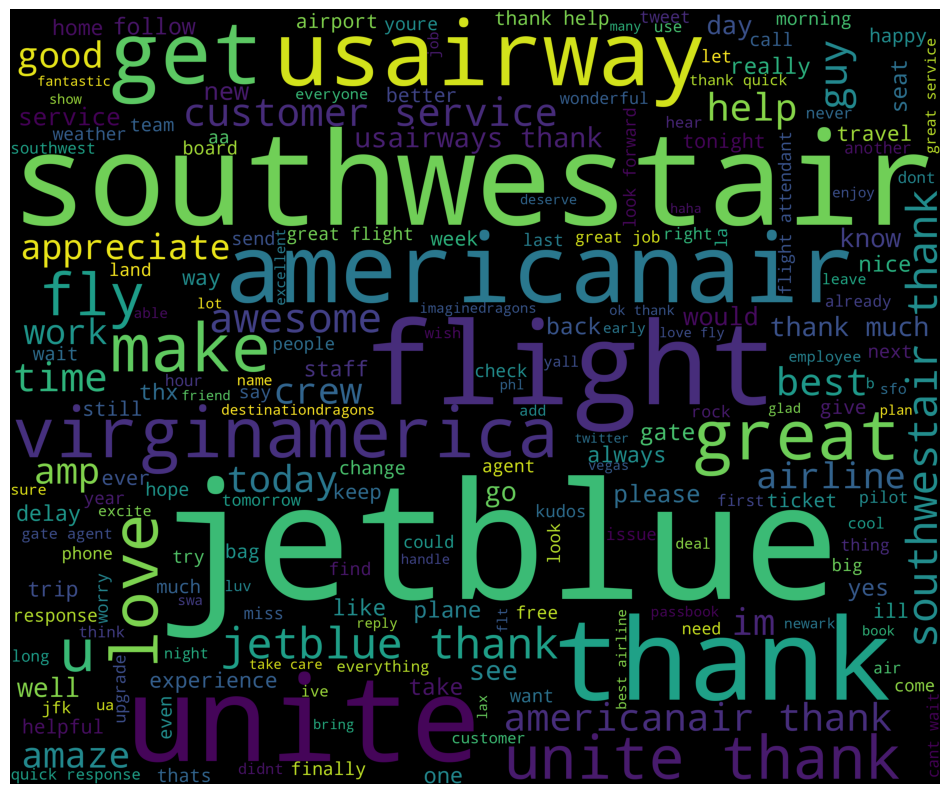

In [ ]:
from wordcloud import WordCloud

new_df = df[df["target"] == "positive"]
words = " ".join(new_df["reviews"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = stop_words_eng,background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
## saving clean sample data
df.to_csv("sentiment_analysis_clean_lemitized_data.csv", index=False)

___
___